# T-s-Diagramm - Qualitativ

In [2]:
import CoolProp.CoolProp as CP
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

print("CoolProp Version:", CP.get_global_param_string("version"))

CoolProp Version: 7.2.0


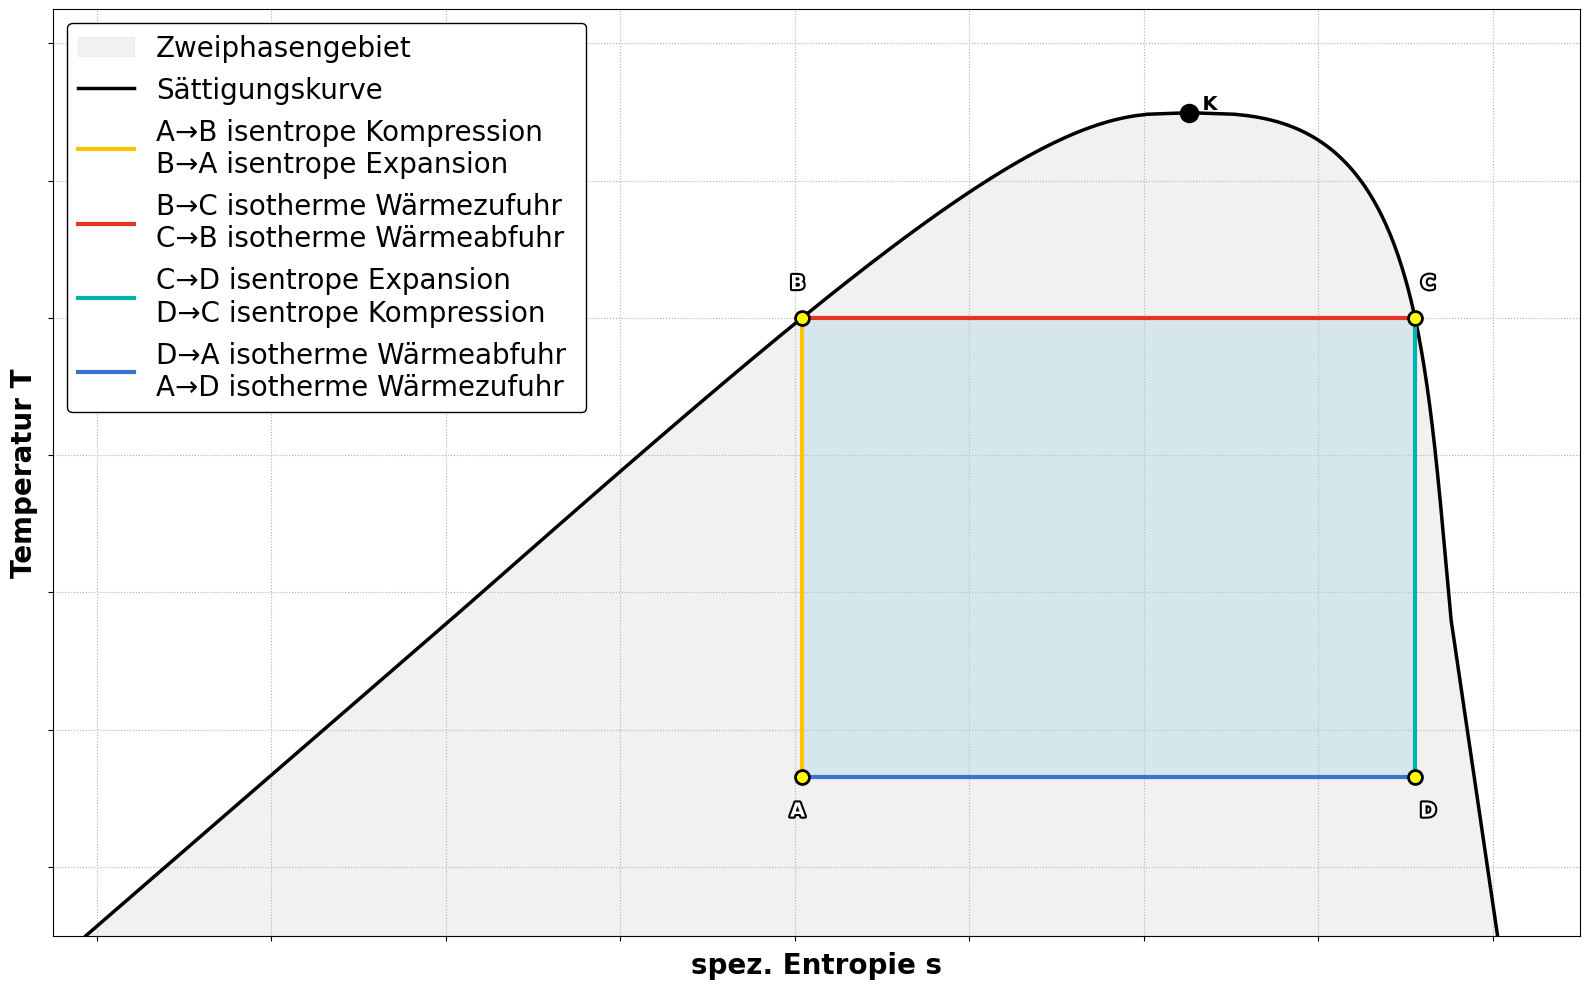

In [30]:
# ============================================================================
# T-s-DIAGRAMM - Qualitativ (Carnot-Prozess)
# ============================================================================

# Arbeitsfluid
fluid = 'R290'  # Propan

# Druckbereich
p_min = 0.90e6   # Pa
p_crit = CP.PropsSI('Pcrit', fluid)  # Kritischer Druck in Pa
T_crit = CP.PropsSI('Tcrit', fluid)  # Kritische Temperatur in K

# Entropiebereich
s_min = 750    # J/(kg·K)
s_max = 2500   # J/(kg·K)

# Temperaturbereich
T_min = 250    # K
T_max = 385    # K

# Sättigungskurve (Siedelinie und Taulinie) für T-s-Diagramm
p_sat_Ts = np.linspace(p_min, p_crit, 200)
s_liquid = []  # Siedelinie
s_vapor = []   # Taulinie
T_sat = []     # Sättigungstemperatur

for p in p_sat_Ts:
    try:
        if p < p_crit:
            s_l = CP.PropsSI('S', 'P', p, 'Q', 0, fluid)  # Siedende Flüssigkeit
            s_v = CP.PropsSI('S', 'P', p, 'Q', 1, fluid)  # Gesättigter Dampf
            T_s = CP.PropsSI('T', 'P', p, 'Q', 0, fluid)  # Sättigungstemperatur
        else:
            s_l = CP.PropsSI('S', 'P', p_crit, 'T', T_crit, fluid)
            s_v = s_l
            T_s = T_crit
        s_liquid.append(s_l)
        s_vapor.append(s_v)
        T_sat.append(T_s)
    except:
        s_liquid.append(np.nan)
        s_vapor.append(np.nan)
        T_sat.append(np.nan)

# Erweitere Sättigungslinien bis T_min
# Bestimme Entropie bei T_min für beide Linien
try:
    p_at_Tmin = CP.PropsSI('P', 'T', T_min, 'Q', 0, fluid)
    s_liquid_at_Tmin = CP.PropsSI('S', 'T', T_min, 'Q', 0, fluid)
    s_vapor_at_Tmin = CP.PropsSI('S', 'T', T_min, 'Q', 1, fluid)
    
    # Füge T_min Punkte am Anfang hinzu
    s_liquid = [s_liquid_at_Tmin] + s_liquid
    s_vapor = [s_vapor_at_Tmin] + s_vapor
    T_sat = [T_min] + T_sat
except:
    pass

# Carnot-Prozess Temperaturen
T_2 = 340  # K (hohe Temperatur)
T_3 = 340  # K (hohe Temperatur)
T_1 = 273.15  # K (niedrige Temperatur)
T_4 = 273.15  # K (niedrige Temperatur)

# Carnot-Prozess Entropien (qualitativ gewählt)
s_2 = CP.PropsSI('S', 'T', T_2, 'Q', 0, fluid)  # J/(kg·K)
s_1 = s_2
s_3 = CP.PropsSI('S', 'T', T_3, 'Q', 1, fluid)  # J/(kg·K)
s_4 = s_3

# Plot erstellen
fig, ax = plt.subplots(figsize=(16, 10))

# Zweiphasengebiet füllen
s_liquid_array = np.array(s_liquid)
s_vapor_array = np.array(s_vapor)
T_sat_array = np.array(T_sat)

# Entferne NaN-Werte
valid_idx_Ts = ~(np.isnan(s_liquid_array) | np.isnan(s_vapor_array) | np.isnan(T_sat_array))
s_liquid_valid = s_liquid_array[valid_idx_Ts]
s_vapor_valid = s_vapor_array[valid_idx_Ts]
T_sat_valid = T_sat_array[valid_idx_Ts]

# Zweiphasengebiet bis zum unteren Rand füllen
ax.fill_betweenx(T_sat_valid, s_liquid_valid, s_vapor_valid, 
                 color='lightgray', alpha=0.3, zorder=1, label='Zweiphasengebiet')

# Carnot-Prozess Fläche füllen (hellblau)
s_carnot = [s_1, s_2, s_3, s_4, s_1]  # Geschlossener Pfad
T_carnot = [T_1, T_2, T_3, T_4, T_1]
ax.fill(s_carnot, T_carnot, color='lightblue', alpha=0.4, zorder=2)

# Sättigungskurve zeichnen
ax.plot(s_liquid_array, T_sat_array, 'k-', linewidth=2.5, 
        label='Sättigungskurve', zorder=3)
ax.plot(s_vapor_array, T_sat_array, 'k-', linewidth=2.5, zorder=3)

# Kritischen Punkt markieren
s_crit = CP.PropsSI('S', 'P', p_crit, 'T', T_crit, fluid)
ax.plot(s_crit, T_crit, 'ko', markersize=12, markerfacecolor='black', 
        markeredgewidth=2, zorder=7)
ax.text(s_crit, T_crit, '  K', fontsize=14, fontweight='bold', 
        ha='left', va='bottom', color='black')

# Carnot-Prozess einzeichnen
# 1 → 2: Isentrope Kompression (vertikal nach oben)
s_12 = np.linspace(s_1, s_2, 50)
T_12 = np.linspace(T_1, T_2, 50)
ax.plot(s_12, T_12, color='#FCC204', linewidth=3, label='A→B isentrope Kompression \nB→A isentrope Expansion', zorder=5)

# 2 → 3: Isotherme Wärmezufuhr (horizontal nach rechts)
s_23 = np.linspace(s_2, s_3, 50)
T_23 = np.full(50, T_2)
ax.plot(s_23, T_23, '#E63323', linewidth=3, label='B→C isotherme Wärmezufuhr \nC→B isotherme Wärmeabfuhr', zorder=5)

# 3 → 4: Isentrope Expansion (vertikal nach unten)
s_34 = np.linspace(s_3, s_4, 50)
T_34 = np.linspace(T_3, T_4, 50)
ax.plot(s_34, T_34, '#00B3AB', linewidth=3, label='C→D isentrope Expansion \nD→C isentrope Kompression', zorder=5)

# 4 → 1: Isotherme Wärmeabfuhr (horizontal nach links)
s_41 = np.linspace(s_4, s_1, 50)
T_41 = np.full(50, T_4)
ax.plot(s_41, T_41, '#3B73CE', linewidth=3, label='D→A isotherme Wärmeabfuhr \nA→D isotherme Wärmezufuhr', zorder=5)

# Zustandspunkte markieren
states_Ts = [
    (s_1, T_1, 'A', -5, -5),  # links unten
    (s_2, T_2, 'B', -5, 5),   # links oben
    (s_3, T_3, 'C', 15, 5),    # rechts oben
    (s_4, T_4, 'D', 15, -5)    # rechts unten
]

for s, T, label, offset_x, offset_y in states_Ts:
    ax.plot(s, T, 'ko', markersize=10, markerfacecolor='yellow', 
            markeredgewidth=2, zorder=6)
    text = ax.text(s + offset_x, T + offset_y, f'{label}', fontsize=14, fontweight='bold', 
                   ha='center', va='center', color='white', zorder=7)
    text.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground='black'),
        path_effects.Normal()
    ])

# Achsenbeschriftung und Layout
ax.set_xlabel('spez. Entropie s', fontsize=20, fontweight='bold')
ax.set_ylabel('Temperatur T', fontsize=20, fontweight='bold')
ax.grid(True, which='both', linestyle=':', alpha=1.0)
ax.legend(loc='upper left', fontsize=20, framealpha=1.0, edgecolor='black')
ax.set_xlim([s_min, s_max])
ax.set_ylim([T_min, T_max])

# Achsenskalen ausblenden (qualitative Darstellung)
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.tight_layout()
plt.show()